In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from helper import make_windows

In [2]:
window_size = 100
batch_size = 10

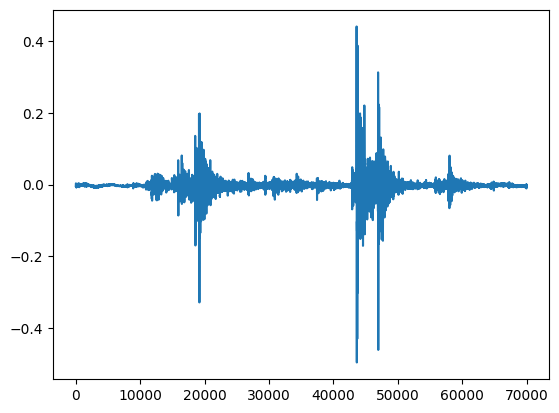

In [3]:
sample_data = np.loadtxt("datasets/sample_data.txt")[30000:100000]/4e6
plt.plot(sample_data)

In [4]:
windows,labels = make_windows(sample_data)
windows.shape,labels.shape

((69891, 100), (69891, 10))

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

### Model 1: Dense model with 1 hidden layer

In [24]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(batch_size,activation="linear"), # linear activation is the same as no activation
    ]
)
model_1.compile(optimizer="adam",loss="mae",metrics=["mae"])
model_1.fit(windows,labels,epochs=100,batch_size=32,callbacks=[es],validation_split=0.2)

pred = model_1.predict(windows)

Epoch 1/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0061 - mae: 0.0061 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 2/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 3/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0049 - mae: 0.0049 - val_loss: 0.0022 - val_mae: 0.0022
Epoch 4/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 5/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0047 - mae: 0.0047 - val_loss: 0.0022 - val_mae: 0.0022
Epoch 6/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0046 - mae: 0.0046 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 7/100
1748/1748 [==============================] - 3s 2ms/step - loss: 0.0045 - mae: 0.0045 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 8/100
1748/1748 [==============================] 

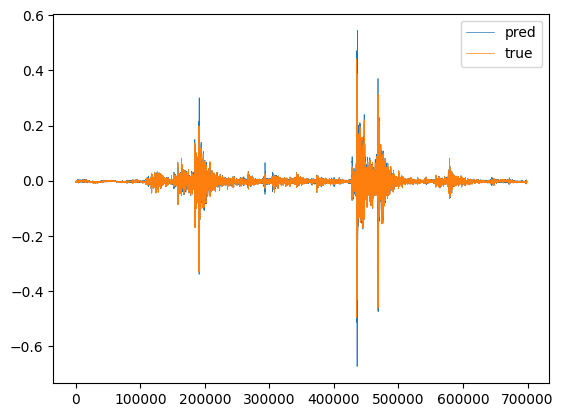

In [22]:
plt.plot(pred.flatten(),label="pred",linewidth=0.5)
plt.plot(labels.flatten(),label="true",linewidth=0.5)
plt.legend()